In [1]:
import json
from collections import defaultdict
from sklearn import linear_model
import numpy as np
import random
import gzip
import dateutil.parser
import math
import pandas as pd

In [2]:
f = gzip.open("modcloth_final_data.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [3]:
f = gzip.open("renttherunway_final_data.json.gz")
dataset2 = []
for l in f:
    dataset2.append(json.loads(l))

In [4]:
dataset

[{'item_id': '123373',
  'waist': '29',
  'size': 7,
  'quality': 5,
  'cup size': 'd',
  'hips': '38',
  'bra size': '34',
  'category': 'new',
  'bust': '36',
  'height': '5ft 6in',
  'user_name': 'Emily',
  'length': 'just right',
  'fit': 'small',
  'user_id': '991571'},
 {'item_id': '123373',
  'waist': '31',
  'size': 13,
  'quality': 3,
  'cup size': 'b',
  'hips': '30',
  'bra size': '36',
  'category': 'new',
  'length': 'just right',
  'height': '5ft 2in',
  'user_name': 'sydneybraden2001',
  'fit': 'small',
  'user_id': '587883'},
 {'item_id': '123373',
  'waist': '30',
  'size': 7,
  'quality': 2,
  'cup size': 'b',
  'shoe size': '9.00',
  'bra size': '32',
  'category': 'new',
  'length': 'slightly long',
  'height': '5ft 7in',
  'user_name': 'Ugggh',
  'fit': 'small',
  'user_id': '395665'},
 {'item_id': '123373',
  'category': 'new',
  'size': 21,
  'quality': 5,
  'user_name': 'alexmeyer626',
  'length': 'just right',
  'fit': 'fit',
  'cup size': 'dd/e',
  'user_id': 

In [5]:
dataset2

[{'fit': 'fit',
  'user_id': '420272',
  'bust size': '34d',
  'item_id': '2260466',
  'weight': '137lbs',
  'rating': '10',
  'rented for': 'vacation',
  'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
  'body type': 'hourglass',
  'review_summary': 'So many compliments!',
  'category': 'romper',
  'height': '5\' 8"',
  'size': 14,
  'age': '28',
  'review_date': 'April 20, 2016'},
 {'fit': 'fit',
  'user_id': '273551',
  'bust size': '34b',
  'item_id': '153475',
  'weight': '132lbs',
  'rating': '10',
  'rented for': 'other',
  'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
  'body type': 'straight & narr

In [6]:
len(dataset)

82790

In [7]:
len(dataset2)

192544

In [8]:
#use weight, age, height, and category as features

In [9]:
#histogram for showcasing height distribution?

In [10]:
# predict size

In [11]:
# try logistic regression or linear

In [12]:
# try random forest regression

In [13]:
#bar chart for category and find how many people fall into each one (for certain age ranges)

In [14]:
#calulate the weight vs age - metabolism or no correlation

In [15]:
dataset2[1]['age']

'36'

In [16]:
ages = []
heights = []
weights = []
categories = []
sizes = []

for entry in dataset2:
    if ('age' in entry) & ('height' in entry) & ('weight' in entry) & ('category' in entry) & ('size' in entry):
        if int(entry['age']) > 0:
            ages.append(int(entry['age']))
            heights.append(entry['height'])
            weights.append(entry['weight'])
            categories.append(entry['category'])
            sizes.append(entry['size'])

In [17]:
len(ages) #number of entries that have all the keys we need

161750

In [18]:
# Now we preprocess the heights to cm

In [19]:
dataset2[0]['height']

'5\' 8"'

In [20]:
import re

In [21]:
cm_heights = []

for h in heights:
    d = h.split(" ") 
    d1 = re.sub("[^0-9]", "", d[0])
    d2 = re.sub("[^0-9]", "", d[1])
    cm_heights.append(int(d1) * 30.48 + int(d2) * 2.54)

In [22]:
cm_heights[0]

172.72

In [23]:
# Now we preprocess the weights to integer form (kg)

In [24]:
dataset2[0]['weight']

'137lbs'

In [25]:
kg_weights = [int(re.sub("[^0-9]", "", w)) * 0.453592 for w in weights]

In [26]:
kg_weights[0]

62.142103999999996

In [27]:
# Now we check the category values

In [28]:
np.unique(categories, return_counts=True)

(array(['ballgown', 'blazer', 'blouse', 'blouson', 'bomber', 'buttondown',
        'caftan', 'cami', 'cape', 'cardigan', 'coat', 'combo', 'crewneck',
        'culotte', 'culottes', 'down', 'dress', 'duster', 'for', 'frock',
        'gown', 'henley', 'hoodie', 'jacket', 'jeans', 'jogger',
        'jumpsuit', 'kaftan', 'kimono', 'knit', 'legging', 'leggings',
        'maxi', 'midi', 'mini', 'overalls', 'overcoat', 'pant', 'pants',
        'parka', 'peacoat', 'poncho', 'print', 'pullover', 'romper',
        'sheath', 'shift', 'shirt', 'shirtdress', 'skirt', 'skirts',
        'skort', 'suit', 'sweater', 'sweatershirt', 'sweatpants',
        'sweatshirt', 't-shirt', 'tank', 'tee', 'tight', 'top', 'trench',
        'trouser', 'trousers', 'tunic', 'turtleneck', 'vest'], dtype='<U12'),
 array([   13,   673,   533,    11,   111,     1,     4,    14,    76,
          213,   842,     8,     1,    65,   169,   400, 78002,    12,
            5,   183, 36831,     7,    11,  2048,     4,     4,  4431

In [29]:
pd.Series(categories).value_counts()

dress           78002
gown            36831
sheath          16306
shift            4432
jumpsuit         4431
                ...  
sweatershirt        4
overcoat            1
buttondown          1
crewneck            1
sweatpants          1
Name: count, Length: 68, dtype: int64

In [30]:
#dresses, gowns, and sheaths are most popular, so we will look at those

In [31]:
len(ages)

161750

In [32]:
len(cm_heights)

161750

In [33]:
len(kg_weights)

161750

In [34]:
len(categories)

161750

In [35]:
df = pd.DataFrame({'age': ages, 'height': cm_heights, 'weight': kg_weights, 'category': categories})

In [36]:
df.head()

,age,height,weight,category
0,28,172.72,62.142104,romper
1,36,167.64,59.874144,gown
2,34,165.10,61.234920,dress
3,27,175.26,65.770840,gown
4,45,172.72,62.595696,dress


In [37]:
import matplotlib.pyplot as plt

In [38]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [39]:
# grouped bar chart of categories in correspondance with age groups

In [40]:
np.min(ages)

1

In [41]:
np.max(ages)

117

In [42]:
np.mean(ages)

34.01953013910355

In [43]:
#sort dress, gown, sheath

In [44]:
#groups of 1-10, 10-20, 20-30, 30-40, 50-60, 60-70, 70+

In [45]:
def countAttire(dic, a):
    if (a > 0) & (a <= 10):
        dic['0-10s'] += 1
    elif (a > 10) & (a <= 20):
        dic['10-20s'] += 1
    elif (a > 20) & (a <= 30):
        dic['20-30s'] += 1
    elif (a > 30) & (a <= 40):
        dic['30-40s'] += 1
    elif (a > 40) & (a <= 50):
        dic['40-50s'] += 1
    elif (a > 50) & (a <= 60):
        dic['50-60s'] += 1
    else:
        dic['60+'] += 1

In [46]:
counter = 0
dresses = {'0-10s': 0, '10-20s': 0, '20-30s': 0, '30-40s': 0, '40-50s' : 0, '50-60s': 0, '60+': 0}
gowns = {'0-10s': 0, '10-20s': 0, '20-30s': 0, '30-40s': 0, '40-50s' : 0, '50-60s': 0, '60+': 0}
sheaths = {'0-10s': 0, '10-20s': 0, '20-30s': 0, '30-40s': 0, '40-50s' : 0, '50-60s': 0, '60+': 0}

for a in ages:
    if categories[counter] == "dress":
        countAttire(dresses, a)
    elif categories[counter] == "gown":
        countAttire(gowns, a)
    elif categories[counter] == "sheath":
        countAttire(sheaths, a)
    counter = counter + 1

In [47]:
sum(dresses.values()) #Good

78002

In [48]:
sum(gowns.values()) #Good

36831

In [49]:
sum(sheaths.values()) #Good

16306

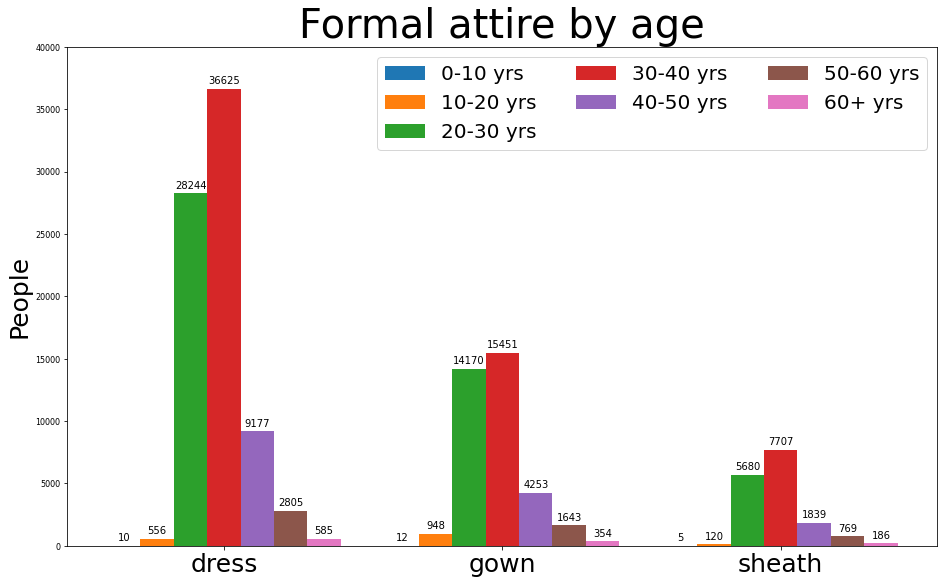

In [50]:
attire = ("dress", "gown", "sheath")
age_count = {
    '0-10 yrs': (dresses['0-10s'], gowns['0-10s'], sheaths['0-10s']),
    '10-20 yrs': (dresses['10-20s'], gowns['10-20s'], sheaths['10-20s']),
    '20-30 yrs': (dresses['20-30s'], gowns['20-30s'], sheaths['20-30s']),
    '30-40 yrs': (dresses['30-40s'], gowns['30-40s'], sheaths['30-40s']),
    '40-50 yrs': (dresses['40-50s'], gowns['40-50s'], sheaths['40-50s']),
    '50-60 yrs': (dresses['50-60s'], gowns['50-60s'], sheaths['50-60s']),
    '60+ yrs': (dresses['60+'], gowns['60+'], sheaths['60+'])
}

x = np.arange(len(attire))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(13, 8))

for attribute, measurement in age_count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('People', fontsize = 25)
ax.set_title('Formal attire by age', fontsize = 40)
ax.set_xticks(x + 3 * width, attire, fontsize = 25)
ax.legend(loc='upper right', ncols=3, prop={'size': 20})
ax.set_ylim(0, 40000)

plt.show()

In [51]:
# weight vs age scatter or line plot

In [52]:
import matplotlib.pyplot
import pylab

In [53]:
x = ages
y = kg_weights

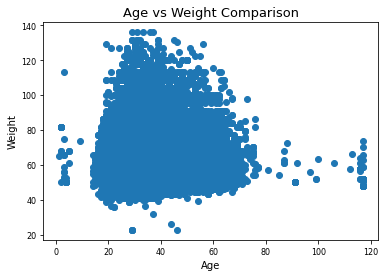

In [54]:
plt.scatter(x, y)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Weight', fontsize=10)
plt.title('Age vs Weight Comparison', fontsize = 13)
plt.show()

In [104]:
x = kg_weights
y = cm_heights

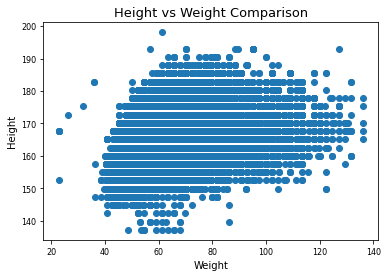

In [106]:
plt.scatter(x, y)
plt.xlabel('Weight', fontsize=10)
plt.ylabel('Height', fontsize=10)
plt.title('Height vs Weight Comparison', fontsize = 13)
plt.show()

In [55]:
df.describe()

,age,height,weight
count,161750.000000,161750.000000,161750.000000
mean,34.019530,165.790158,62.319017
std,8.108342,6.738160,9.932361
min,1.000000,137.160000,22.679600
25%,29.000000,160.020000,55.791816
50%,32.000000,165.100000,61.234920
75%,37.000000,170.180000,67.131616
max,117.000000,198.120000,136.077600


In [56]:
#OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [57]:
x = []
y = []
counter = 0

le = LabelEncoder().fit(['dress', 'gown', 'sheath'])

for a in ages:
    if (categories[counter] == "dress") | (categories[counter] == "gown") | (categories[counter] == "sheath"):
        x.append([a, cm_heights[counter], kg_weights[counter], le.transform([categories[counter]])[0]])
        y.append(sizes[counter])
    counter = counter + 1

In [58]:
x

[[36, 167.64000000000001, 59.874144, 1],
 [34, 165.1, 61.23492, 0],
 [27, 175.26, 65.77083999999999, 1],
 [45, 172.72, 62.595696, 0],
 [27, 160.02, 50.802304, 0],
 [65, 160.02, 53.523856, 0],
 [33, 160.02, 51.709488, 1],
 [33, 160.02, 61.23492, 0],
 [30, 167.64000000000001, 61.23492, 0],
 [26, 167.64000000000001, 54.431039999999996, 2],
 [29, 157.48000000000002, 64.410064, 0],
 [32, 165.1, 53.523856, 1],
 [35, 172.72, 77.11064, 0],
 [26, 165.1, 64.863656, 0],
 [28, 160.02, 52.16308, 0],
 [33, 167.64000000000001, 61.23492, 1],
 [33, 165.1, 65.77083999999999, 0],
 [30, 167.64000000000001, 63.50288, 0],
 [21, 167.64000000000001, 54.431039999999996, 0],
 [27, 172.72, 63.50288, 0],
 [30, 167.64000000000001, 63.50288, 0],
 [20, 167.64000000000001, 54.431039999999996, 0],
 [32, 160.02, 63.50288, 0],
 [32, 154.94, 55.791816, 2],
 [37, 160.02, 55.791816, 1],
 [50, 165.1, 55.338224, 1],
 [43, 160.02, 50.802304, 1],
 [29, 177.8, 74.84268, 1],
 [32, 160.02, 64.863656, 1],
 [29, 167.64000000000001,

In [59]:
y

[12,
 8,
 12,
 8,
 4,
 8,
 1,
 12,
 8,
 8,
 20,
 2,
 20,
 12,
 8,
 21,
 12,
 12,
 1,
 8,
 8,
 4,
 4,
 4,
 8,
 4,
 8,
 17,
 16,
 1,
 14,
 12,
 28,
 20,
 8,
 28,
 14,
 12,
 4,
 8,
 20,
 20,
 8,
 12,
 4,
 8,
 20,
 4,
 8,
 4,
 4,
 35,
 12,
 12,
 16,
 21,
 24,
 8,
 12,
 8,
 12,
 12,
 12,
 12,
 8,
 16,
 16,
 16,
 12,
 14,
 15,
 4,
 20,
 16,
 8,
 4,
 5,
 1,
 4,
 8,
 4,
 51,
 32,
 8,
 16,
 23,
 48,
 12,
 16,
 8,
 20,
 12,
 21,
 12,
 1,
 12,
 20,
 24,
 4,
 8,
 28,
 20,
 8,
 16,
 12,
 4,
 51,
 24,
 8,
 45,
 8,
 24,
 24,
 9,
 4,
 14,
 24,
 16,
 12,
 12,
 4,
 20,
 8,
 24,
 16,
 12,
 8,
 24,
 12,
 4,
 16,
 8,
 34,
 20,
 8,
 12,
 4,
 45,
 8,
 12,
 24,
 12,
 24,
 12,
 24,
 1,
 39,
 20,
 1,
 12,
 16,
 8,
 1,
 8,
 12,
 7,
 8,
 16,
 8,
 8,
 4,
 8,
 8,
 12,
 16,
 8,
 16,
 12,
 24,
 1,
 8,
 8,
 20,
 8,
 4,
 16,
 12,
 51,
 2,
 4,
 4,
 12,
 8,
 12,
 8,
 9,
 24,
 12,
 14,
 8,
 8,
 8,
 16,
 24,
 8,
 12,
 1,
 4,
 8,
 4,
 8,
 17,
 4,
 8,
 8,
 12,
 12,
 12,
 4,
 8,
 8,
 8,
 12,
 1,
 4,
 1,
 8,
 4,
 12,
 12,
 4,


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [61]:
#Split the data into training + test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [63]:
#Linear Regression Model

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
lr.score(X_train, y_train)

0.757429235112184

In [67]:
lr.coef_

array([ 0.11425837, -0.12288522,  0.71516225,  0.17732374])

In [68]:
lr.intercept_

-16.63483960303582

In [69]:
scores = cross_val_score(lr, X_val, y_val, cv=5)

In [70]:
scores.mean()

0.7611781617674851

In [71]:
y_pred = lr.predict(X_test)

In [103]:
lr.score(X_test, y_test)

0.7529172757015636

In [72]:
mean_squared_error(y_test, y_pred)

16.669703774705756

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [75]:
rf = RandomForestRegressor()

In [76]:
grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [77]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [78]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

In [79]:
new_rf = RandomForestRegressor(n_estimators = 30, min_samples_split = 8, max_features = 'sqrt', bootstrap = True)

In [80]:
new_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)

In [100]:
new_rf.score(X_train, y_train)

0.8331684043269788

In [81]:
scores2 = cross_val_score(new_rf, X_val, y_val, cv=5)

In [82]:
scores2.mean()

0.7549604239822069

In [83]:
y_pred = new_rf.predict(X_test)

In [101]:
new_rf.score(X_test, y_test)

0.7521561954980693

In [84]:
mean_squared_error(y_test, y_pred)

16.721050875467515

In [85]:
#Alternative models

In [86]:
from sklearn import svm

In [87]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [88]:
svm = svm.SVC()

In [89]:
svm.fit(X_train, y_train)

SVC()

In [90]:
scores3 = cross_val_score(svm, X_val, y_val, cv=5)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

In [ ]:
scores3.mean()

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbr = GradientBoostingRegressor()

In [93]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [98]:
gbr.score(X_train, y_train)

0.7700543114352132

In [94]:
scores4 = cross_val_score(gbr, X_val, y_val, cv=5)

In [95]:
scores4.mean()

0.7680362566489395

In [96]:
y_pred = gbr.predict(X_test)

In [99]:
gbr.score(X_test, y_test)

0.7621639177633882

In [97]:
mean_squared_error(y_test, y_pred)

16.045869046806384

# Citations

- Decomposing fit semantics for product size recommendation in metric spaces
Rishabh Misra, Mengting Wan, Julian McAuley
RecSys, 2018



https://www.mdpi.com/2076-3417/12/19/10158

Vleugels, J., Veelaert, L., Peeters, T., Huysmans, T., Danckaers, F., &amp; Verwulgen, S. (2022). Predicting user’s measurements without manual measuring: A case on sports garment applications. Retrieved from https://www.mdpi.com/2076-3417/12/19/10158 

Lin, C., Zhao, Q., Li, J., &amp; Rao, W. (2020, March 5). Size prediction for online clothing shopping with ... - IEEE xplore. IEEE Xplore. https://ieeexplore.ieee.org/abstract/document/9023656 